In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime




In [2]:
portfolio=["SAHOL","TCELL","SOKM","BIMAS","MAVI","VESTL","EREGL","SASA","TUPRS"]

In [3]:
def buy_sell_MA(data,opt=50):
    buy_sell=[]
    buy_signal=[]
    sell_signal=[]
    flag=42

    up=data[(np.array(data["short"]-data["mid"])>0) & (np.array(data["short"]-data["long"])>0)]
    down=data[(np.array(data["short"]-data["mid"])<0) & (np.array(data["short"]-data["long"])<0)]
    ups=np.percentile(np.array(up["short"]-up["mid"]),opt)
    downs=np.percentile(np.array(down["short"]-down["long"]),opt)


    for i in range(0,len(data)):
       if (data["short"][i]>data["mid"][i]+ups) & (data["short"][i]>data["long"][i]+ups):
            buy_signal.append(np.nan)
            if flag !=1:
                sell_signal.append(data["Close"][i])
                buy_sell.append(data["Close"][i])
                flag=1
            else:
                sell_signal.append(np.nan)
       elif(data["short"][i]<data["mid"][i]+downs)&(data["short"][i]<data["long"][i]+downs):
            sell_signal.append(np.nan)
            if flag!=0:
                buy_signal.append(data["Close"][i])
                buy_sell.append(-data["Close"][i])
                flag=0
            else:
                buy_signal.append(np.nan)
       else:
            buy_sell.append(np.nan)
            sell_signal.append(np.nan)
            buy_signal.append(np.nan)

    operations=np.array(buy_sell)
    operations=operations[~np.isnan(operations)]

    neg=0
    pos=0

    for i in range(len(operations)):
        if operations[i]<0:
            neg=i
            break
    for i in range(1,len(operations)):
        if operations[-i]>0:
            pos=i-1
            break
    
    PL=np.sum(operations)
    

    
    
    return (buy_signal,sell_signal,PL)




In [4]:
def stock(ticker):
    data=yf.download(ticker+".IS",start="2020-01-01",end=datetime.date.today())
    data=pd.DataFrame(data)
    data.index=pd.to_datetime(data.index)
    close=pd.DataFrame(data["Close"])
    rolling_app5=close.rolling(window=5).mean()
    rolling_app14=close.rolling(window=14).mean()
    rolling_app21=close.rolling(window=21).mean()
    MAs=pd.concat([close,rolling_app5,rolling_app14,rolling_app21],axis=1)
    MAs.columns=["Close","short","mid","long"]
    MAs=MAs.dropna(axis=0)
    fig,ax=plt.subplots(figsize=(12,4))
    ax.plot(close.index,close,label=ticker)
    ax.plot(rolling_app5.index,rolling_app5,label=ticker+' 5 Günlük Ortalama')
    ax.plot(rolling_app14.index,rolling_app14,label=ticker+' 14 Günlük Ortalama' )
    ax.plot(rolling_app21.index,rolling_app21,label=ticker+' 21 Günlük Ortalama')

    ax.legend(loc='upper left')
    
    def kar(percentile):
       MAs["Buy"]=buy_sell_MA(MAs,percentile)[0]
       MAs["Sell"]=buy_sell_MA(MAs,percentile)[1]
       al=MAs["Buy"]
       al=al.dropna(axis=0)
       sat=MAs["Sell"]
       sat=sat.dropna(axis=0)
       sat_val=sat.values
       al_val=al.values
       res=[]
       if len(al_val)==len(sat_val):
          for i in range(len(al_val)):
            res.append(sat_val[i]/al_val[i])
       elif len(al_val)>len(sat_val):
          al_val=np.delete(al_val,-1)
          for j in range(len(sat_val)):
            res.append(sat_val[j]/al_val[j])
       elif (len(sat_val)>len(al_val)):
          sat_val=np.delete(sat_val,0)
       for k in range(len(al_val)):
          res.append(sat_val[k]/al_val[k])

       df=pd.DataFrame()
       df["Kar"]=res

       return np.prod(df["Kar"])
    
    MAs["Buy"]=buy_sell_MA(MAs,50)[0]
    MAs["Sell"]=buy_sell_MA(MAs,50)[1]
    al=MAs["Buy"]
    al=al.dropna(axis=0)
    sat=MAs["Sell"]
    sat=sat.dropna(axis=0)
    sat_val=sat.values
    al_val=al.values
    percentile=range(1,100)
    kardf=pd.DataFrame()
    kardf["Percentile"]=percentile
    for i in range(len(percentile)):
       kardf.loc[i,1]=kar(percentile[i])
    kardf.columns=["Percentile","Performance"]
    kardf=kardf.sort_values(by="Performance",ascending=False)
    MAs["Buy"]=buy_sell_MA(MAs,kardf["Percentile"].values[0])[0]
    MAs["Sell"]=buy_sell_MA(MAs,kardf["Percentile"].values[0])[1]
    plt.figure(figsize=(12,5))
    plt.scatter(MAs.index,MAs["Buy"],color="green",label='Al',marker='^',alpha=1)
    plt.scatter(MAs.index,MAs["Sell"],color="red",label='Sat',marker='v',alpha=1)
    plt.plot(MAs["Close"],label='Kapanış Fiyatı',alpha=0.5)
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.legend(loc='upper left')
    plt.show()
    al=MAs["Buy"]
    al=al.dropna(axis=0)
    sat=MAs["Sell"]
    sat=sat.dropna(axis=0)
    sat_val=sat.values
    al_val=al.values
    res1=[]

    for i in range(len(sat_val)):
       res1.append((sat_val[i]/al_val[i]))

    df1=pd.DataFrame()
    df1["Kar"]=res1
    res2=[100]
    for i in range(len(df1.index)):
       res2.append(res2[i]*df1["Kar"].loc[i])

    df1["Eldeki Para"]=res2[1:]
    karlilik=df1["Eldeki Para"].iloc[-1]/100
    karlilik=(karlilik-1)*100
    print("Karlılık oranı %",karlilik)
    


[*********************100%***********************]  1 of 1 completed


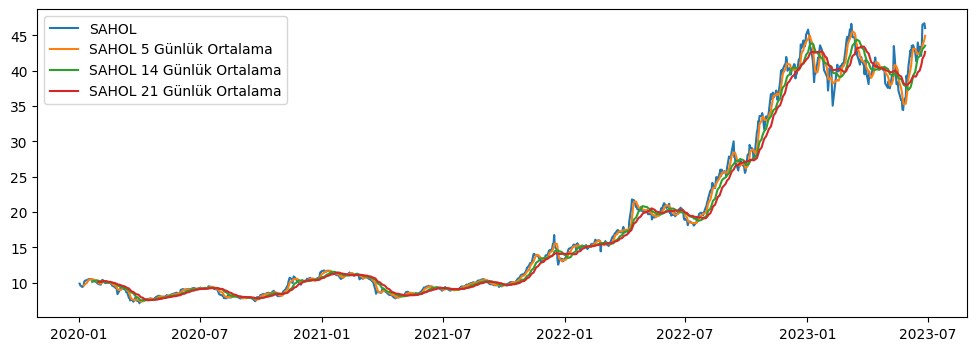

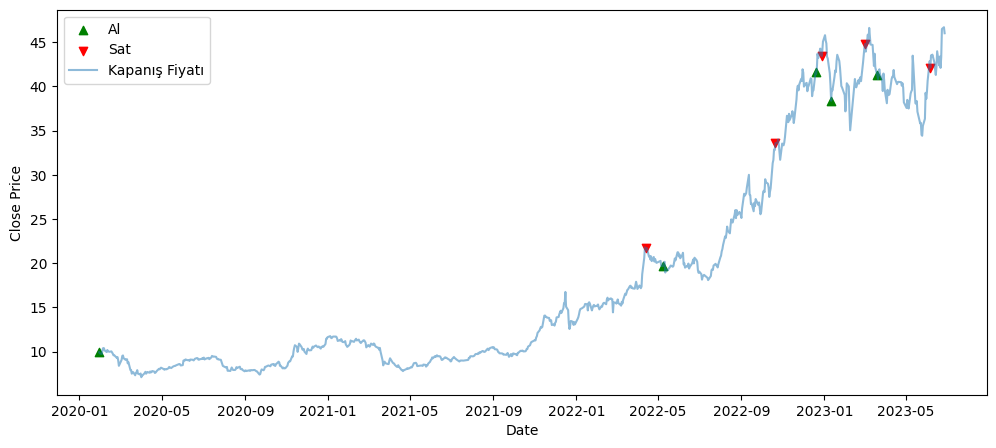

Karlılık oranı % 364.16566920846145
[*********************100%***********************]  1 of 1 completed


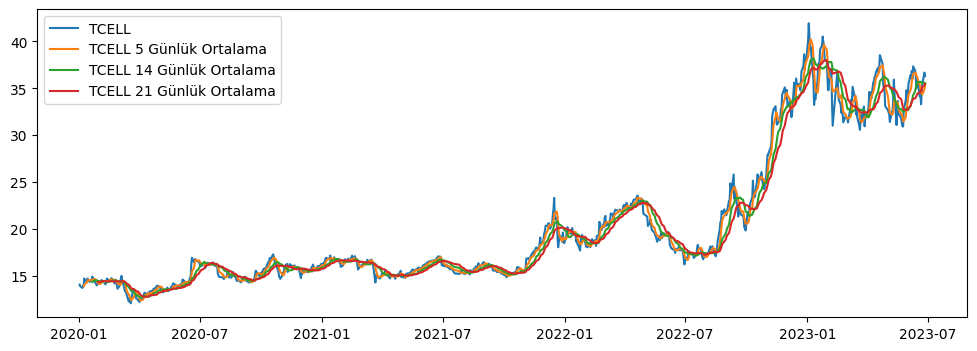

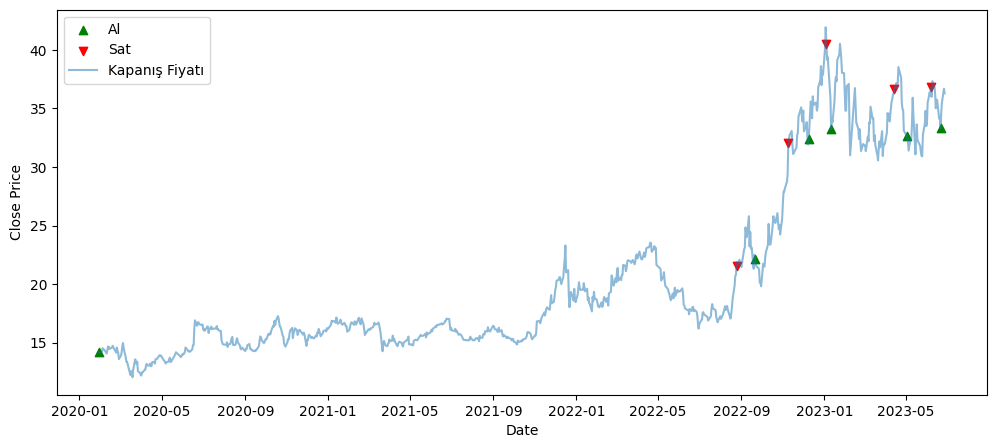

Karlılık oranı % 242.47079136251745
[*********************100%***********************]  1 of 1 completed


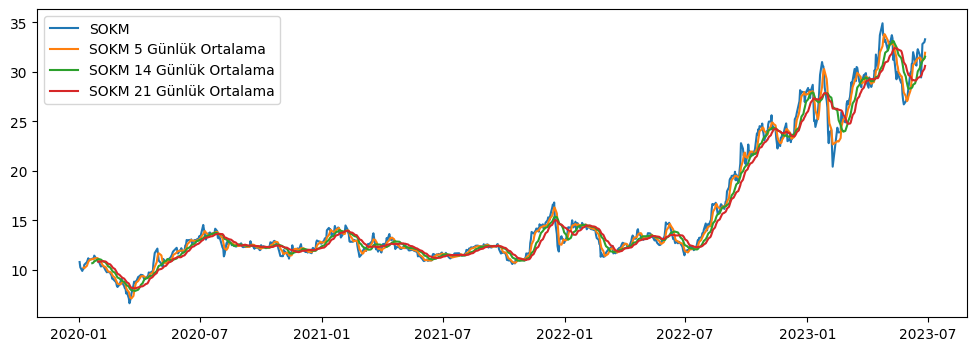

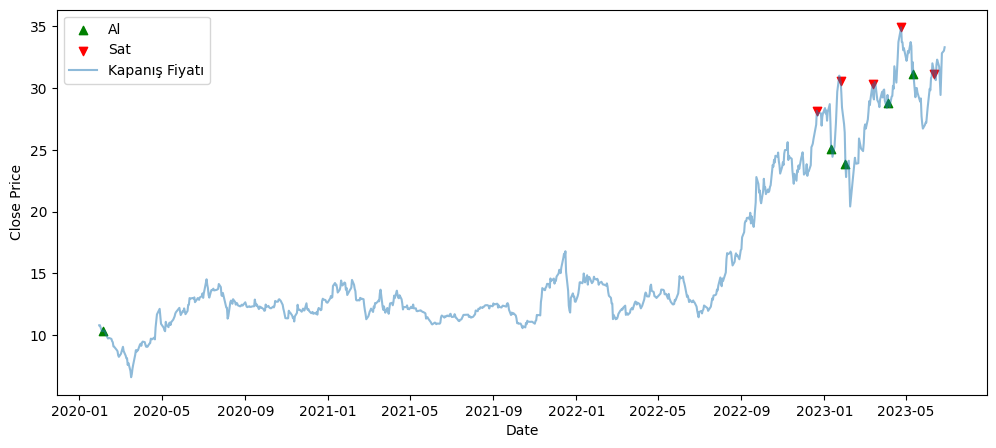

Karlılık oranı % 410.74760732091795
[*********************100%***********************]  1 of 1 completed


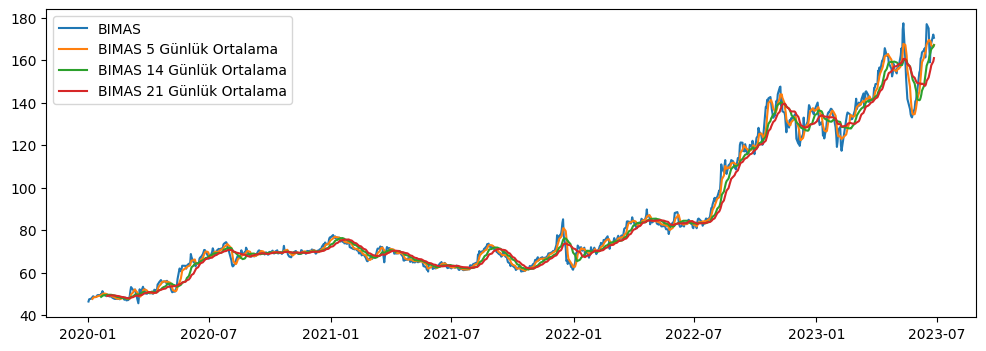

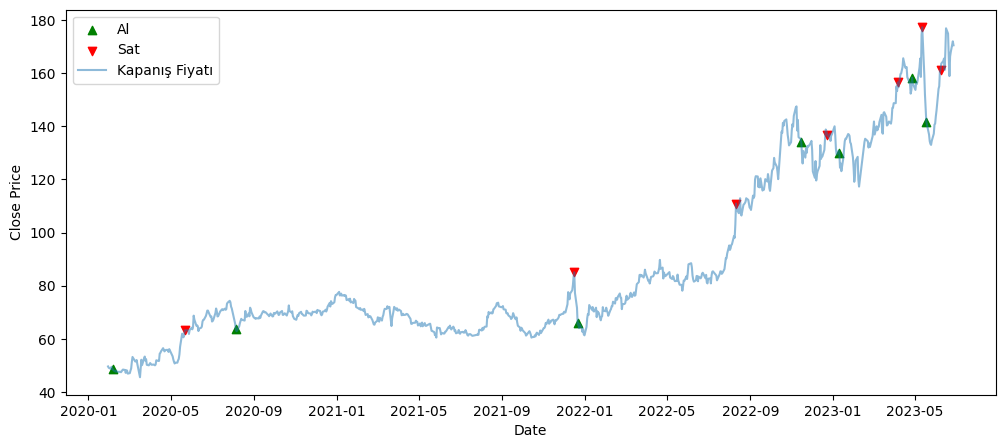

Karlılık oranı % 359.4675387947682
[*********************100%***********************]  1 of 1 completed


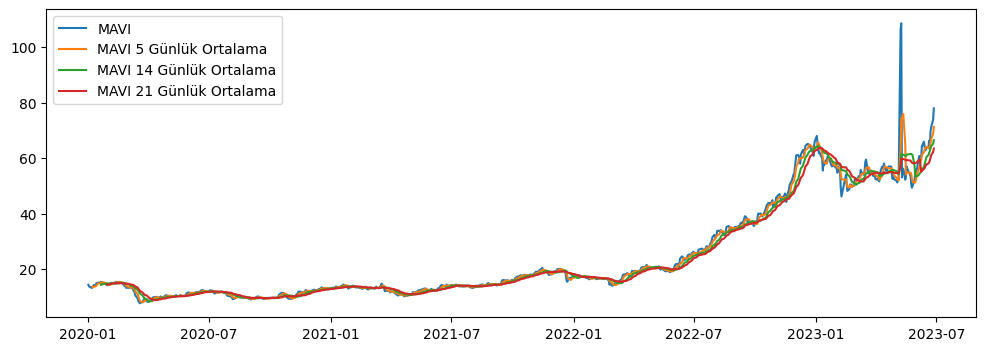

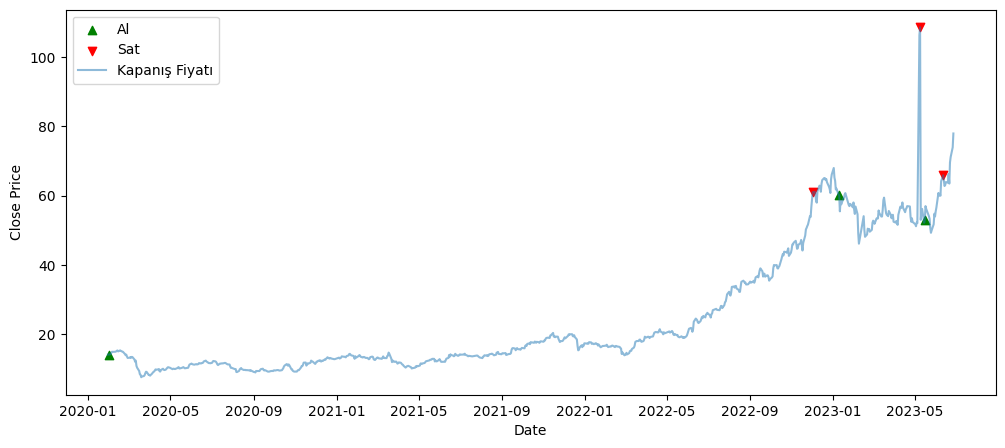

Karlılık oranı % 861.0594055342353
[*********************100%***********************]  1 of 1 completed


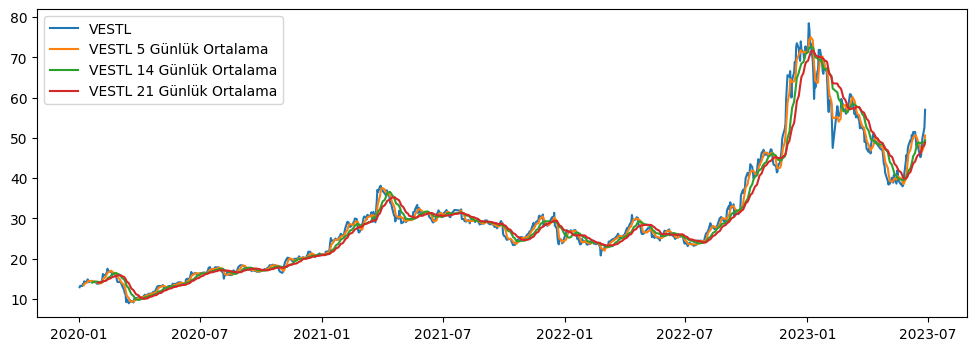

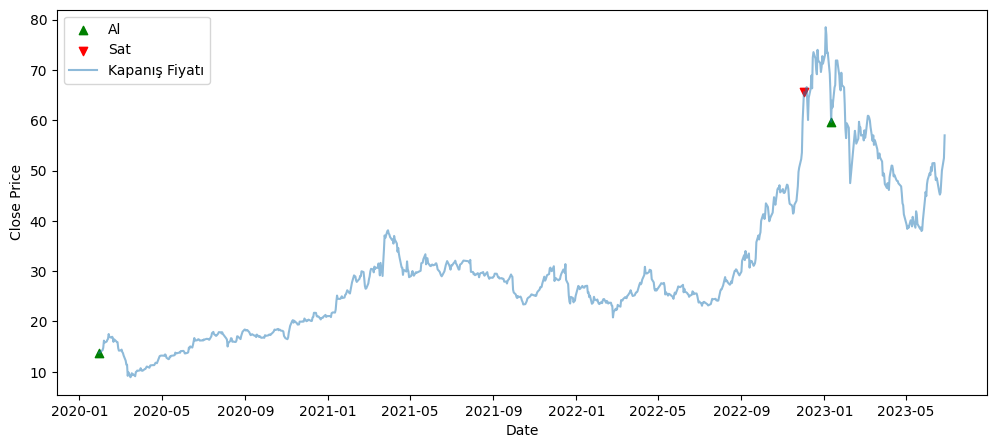

Karlılık oranı % 376.05224778895314
[*********************100%***********************]  1 of 1 completed


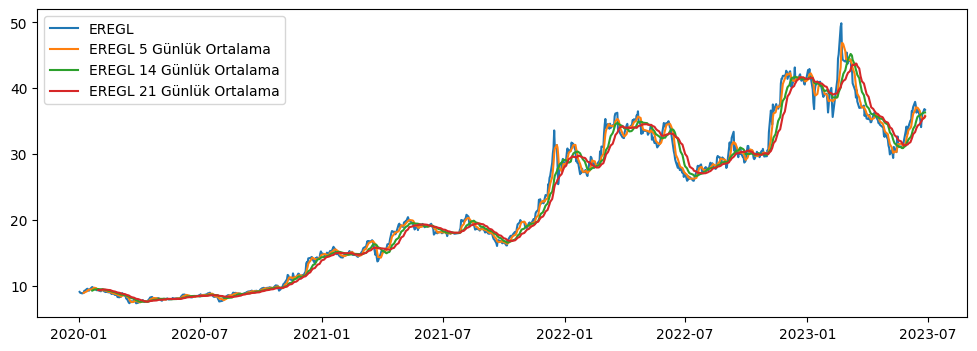

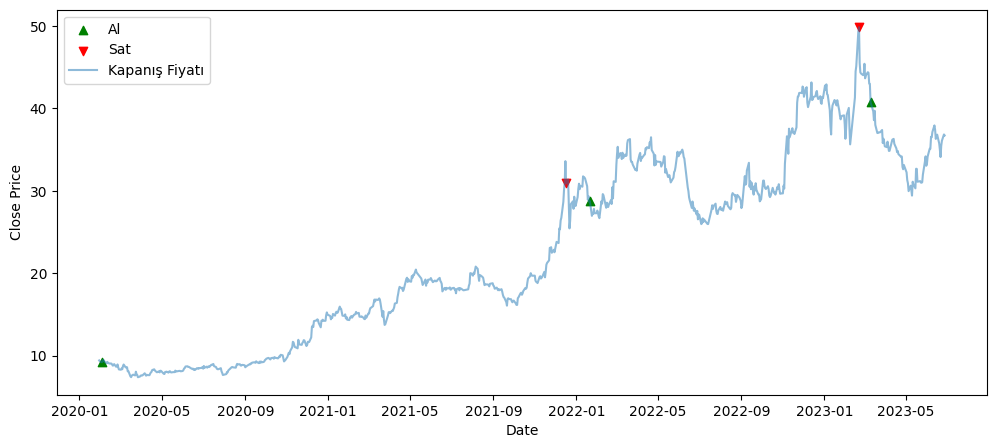

Karlılık oranı % 483.32219541259474
[*********************100%***********************]  1 of 1 completed


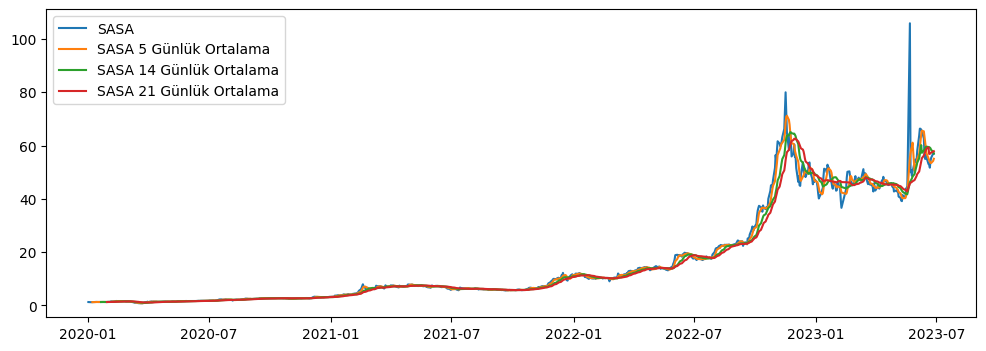

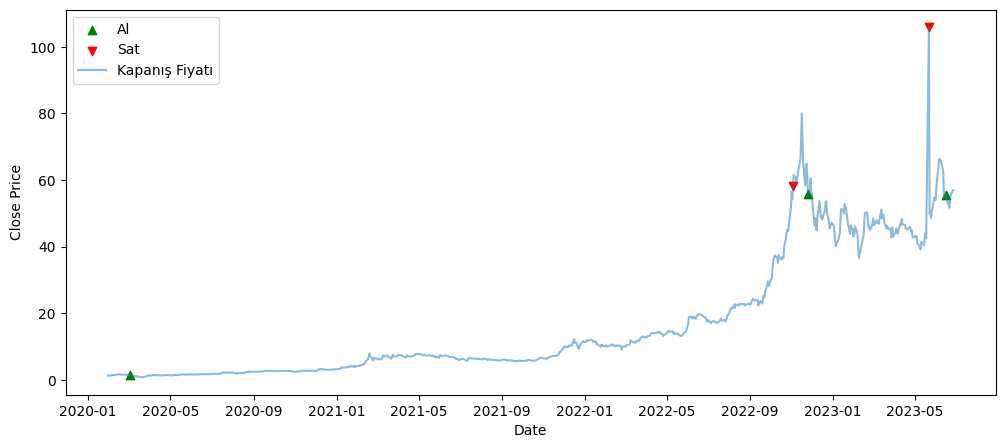

Karlılık oranı % 7768.933838417448
[*********************100%***********************]  1 of 1 completed


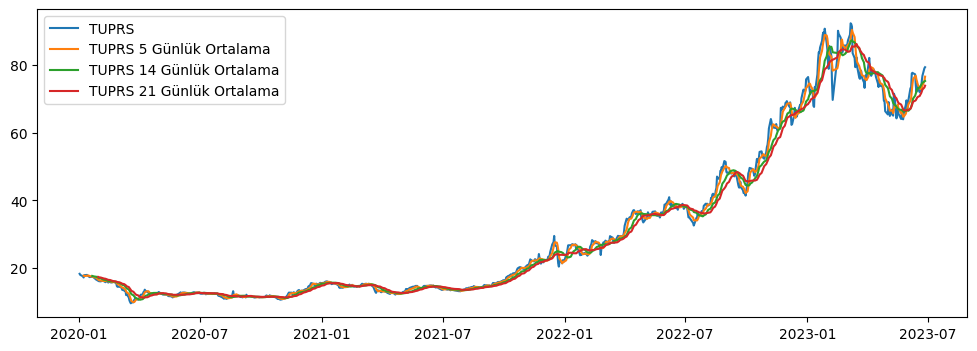

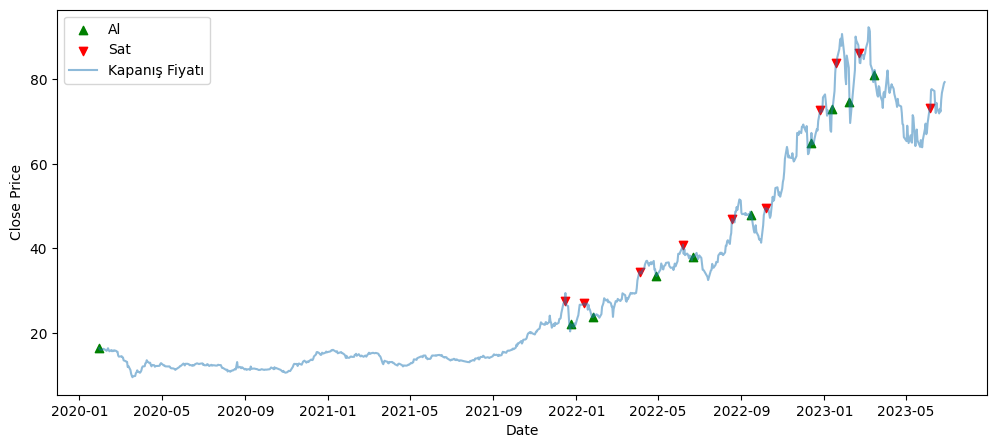

Karlılık oranı % 520.4094484964838


In [5]:
for i in portfolio:
    stock(i)